# Implementation of the Radial Basis Function Kernel From Scratch

The aim of this short program is to demonstrate the mathematics and code involved in calculating the Radial Basis Function (RBF) kernel from scratch. This will provide a clear example of what goes on under the hood when using a RBF kernel in a Support Vector Machine problm. We will use a very simple dataset and an approach based on nested for loops.

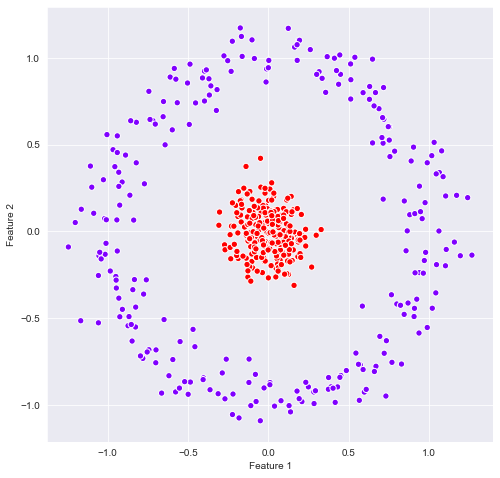

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits.mplot3d import Axes3D

# generate data set
# noise gives the standard deviation of Gaussian noise
# factor gives the scale factor between the inner and outer circles
X, y = make_circles(500, factor = 0.1, noise = 0.1, random_state = 54)

sns.set_style('darkgrid')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow', s = 40, edgecolors = 'white')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

We can see that in this two-dimensional plane it is not possible to insert a one-dimensional line (the hyperplane) to separate the y=0 (purple) and y=1 (red) samples. Therefore, we will use the RBF kernel to project the data into a third dimension where we can separate it with a two-dimensional plane. We start by generating a grid of points in the two-dimensional feature space. 

In [8]:
x1_min = min(X[:,0])
x1_max = max(X[:,0])
x2_min = min(X[:,1])
x2_max = max(X[:,1])
# generate points for grid
x1 = np.linspace(x1_min, x1_max, 100)
x2 = np.linspace(x2_min, x2_max, 100)
# generate grid
X1, X2 = np.meshgrid(x1, x2)
# unravel X1 and Y1 into 1D arrays and vertically stack them
# the rows are made up of every possible (X1, X2) coordinate
points = np.vstack([X1.ravel(), X2.ravel()]).T

The RBF kernel between a point in space $q$ and a sample $X$ can be defined as $$k(q,X) = \exp\left(-\frac{||q - X||^2}{2\sigma^2}\right)$$

The approach we take to compute the RBF is as follows: For a point in the grid, we calculate the RBF for every sample and sum the results. 

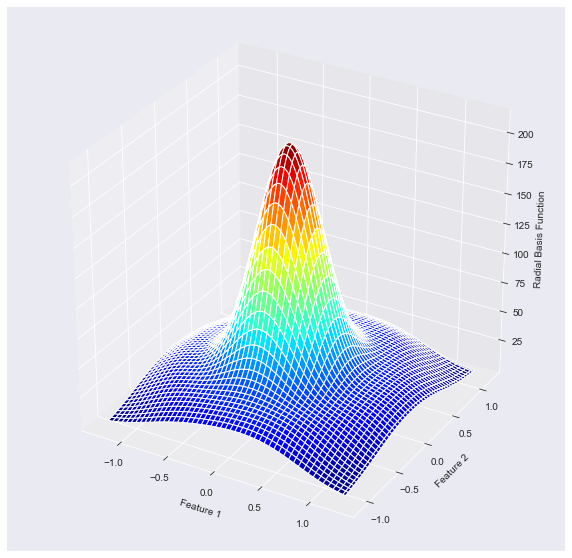

In [11]:
# choose sigma
sigma = 0.3
rbf_grid = []
# for every grid coordinate...
for i in range(points.shape[0]):
    rbf = 0
    # for every sample...
    for j in range(X.shape[0]):
        # calculate rbf function
        rbf += np.exp(-((points[i][0]-X[j][0])**2+(points[i][1]-X[j][1])**2)/(2*sigma**2))
    rbf_grid.append(rbf)
    
# convert rbf list to numpy array and reshape
rbf_grid = np.asarray(rbf_grid).reshape(X1.shape)
# generate 3D plot of RBF
fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot(111, projection = '3d')
ax2.plot_surface(X1, X2, rbf_grid, cmap = cm.jet)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Radial Basis Function')
plt.show()

The resulting function has a maximum at the origin as we would expect from this dataset. 